In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
df= pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [77]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [79]:
df['zipcode'].isnull()



0        False
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Name: zipcode, Length: 21597, dtype: bool

In [78]:
df['zipcode'].dtypes

dtype('int64')

In [3]:
df.corr()['price']

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.276295
view             0.395734
condition        0.036056
grade            0.667951
sqft_above       0.605368
yr_built         0.053953
yr_renovated     0.129599
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

In [4]:
# dropping Latitude, Longitude, ID since they are not much value to the analysis. 
# Dropping "date" since it is in date and time format, which will not be analysis friendly. we can add them later if need be.


df = df.drop(['long','id','date'], axis=1)
df


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,1410,1287


In [5]:
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
#  cleaning sqft_basement column, by converting it to float and replacing ? with 0.
#  we are considering 0 as no basement available for the property

df['sqft_basement'] = df['sqft_basement'].str.replace("?", "0", regex=True).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     19221 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
dtypes: flo

In [7]:
#  Cleaning other columns by filling 0 replacing NA

df ['yr_renovated'] = df ['yr_renovated'].fillna(0)
df['waterfront'] = df['waterfront'].fillna(0)
df['view'] = df['view'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  float64
 7   view           21597 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
dtypes: flo

In [8]:
df['view'].value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [9]:
#  recognising continuous variables

conti_var = df.describe(include = np.number).columns.tolist()
conti_var


['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'sqft_living15',
 'sqft_lot15']

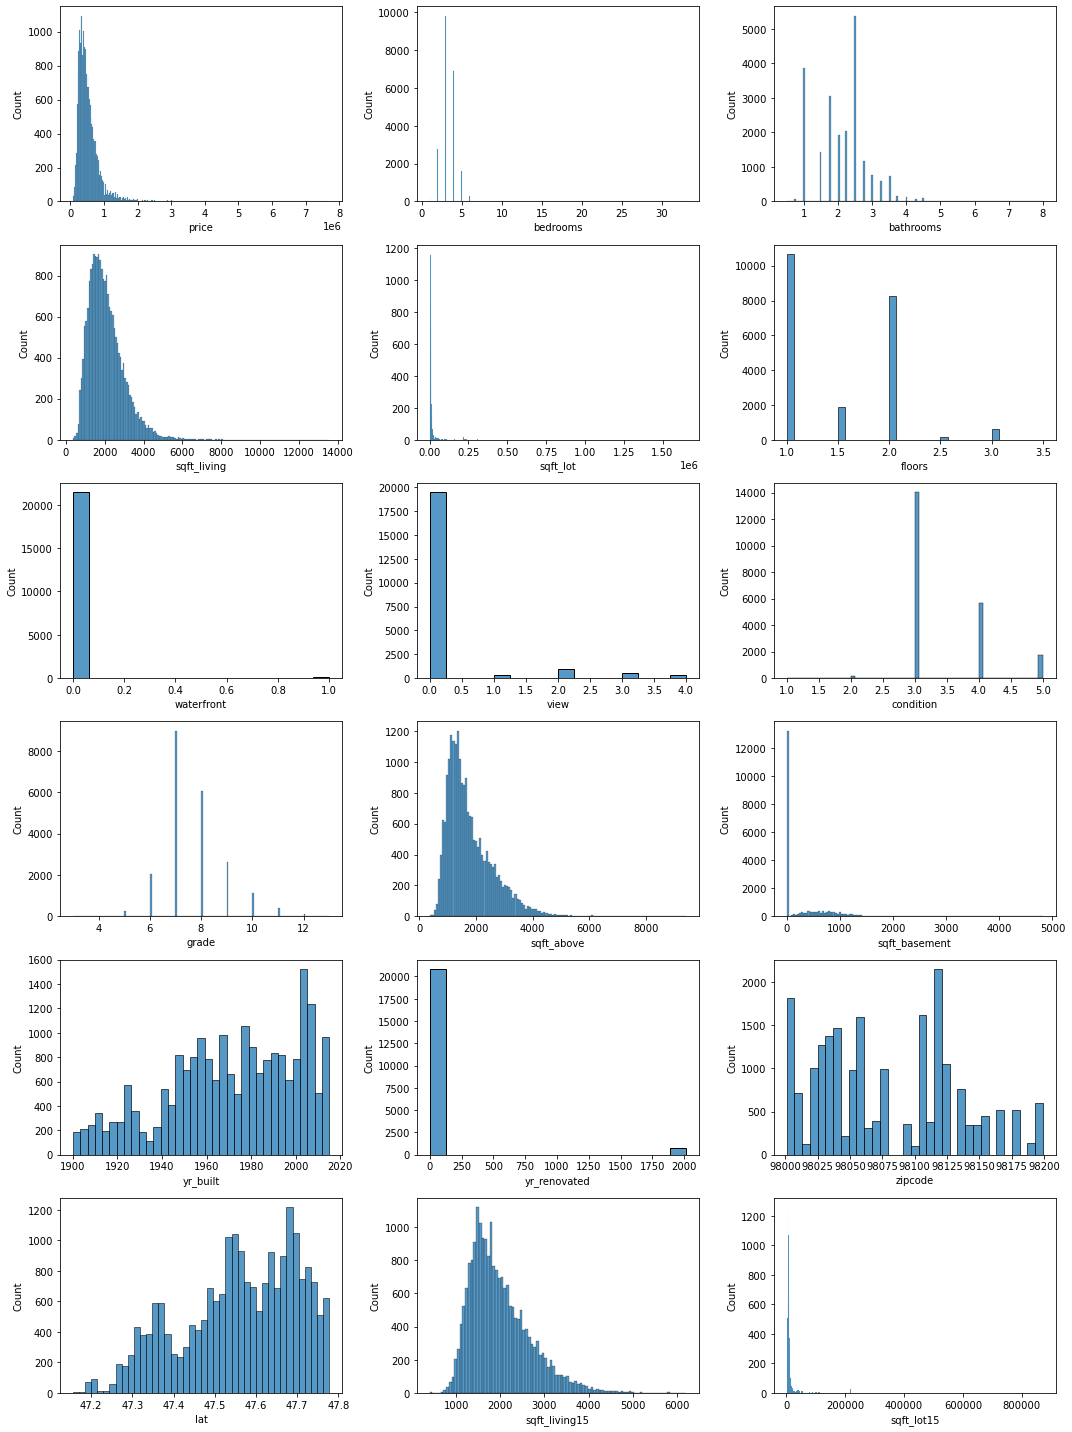

In [10]:
fig, ax = plt.subplots(len(conti_var) //3 + int(np.ceil(len(conti_var)%3)),3, figsize=(15, 20))
for i, c in enumerate(conti_var):
    sns.histplot(df[c], ax=ax[i//3, i%3])
fig.tight_layout()

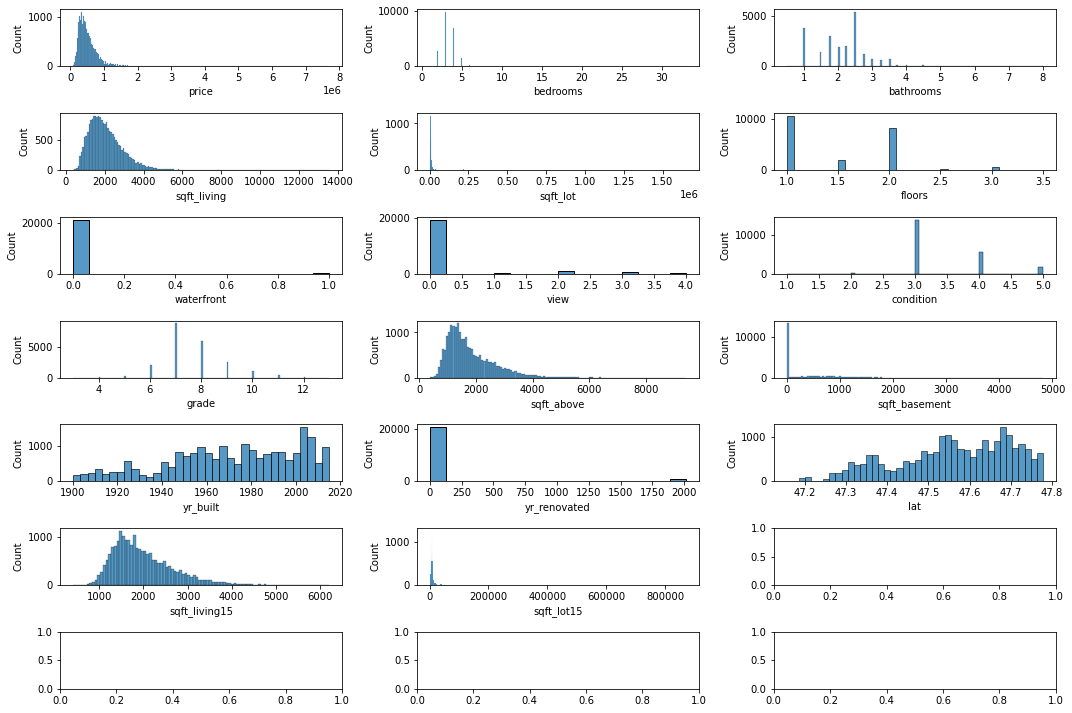

In [12]:
#  Selecting non zero continous variables for log transformation. Plotting to make sure.
# 'price',
#  'bedrooms',
#  'bathrooms',
#  'sqft_living',
#  'sqft_lot',
#  'floors',
#  'waterfront',
#  'view',
#  'condition',
#  'grade',
#  'sqft_above',
#  'sqft_basement',
#  'yr_built',
#  'yr_renovated',
#  'zipcode',
#  'lat',
#  'long',
#  'sqft_living15',
#  'sqft_lot15'
nz_contivar = ['price','bedrooms','bathrooms','sqft_living', 'sqft_lot',
               'floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
               'lat','sqft_living15','sqft_lot15']
df_conti = df[nz_contivar]

fig, ax = plt.subplots(len(nz_contivar)//3 + int(np.ceil(len(nz_contivar) %3)), 3, figsize= (15,10))
for i, c in enumerate (nz_contivar):
    sns.histplot(df_conti[c], ax=ax [i//3, i%3])
fig.tight_layout()

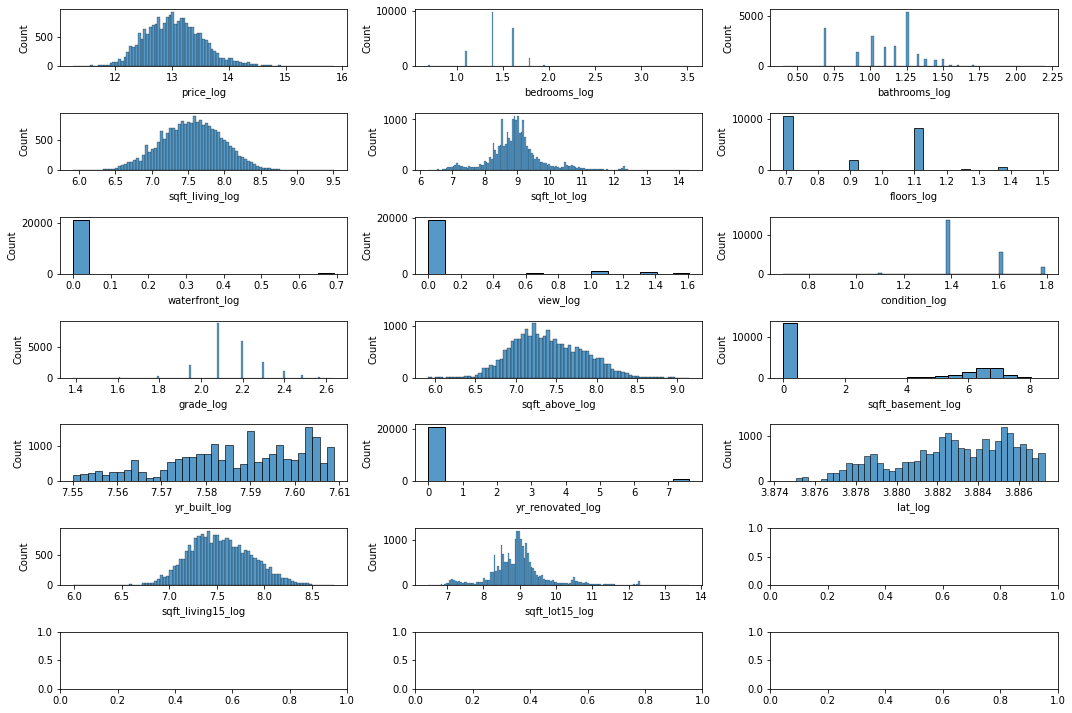

In [13]:
#  perform log transformations

log_var = [f'{c}_log'for c in nz_contivar]

df_log = np.log1p(df_conti)
df_log.columns = log_var

fig, ax = plt.subplots(len(log_var)//3 +int(np.ceil(len(log_var)% 3)),3, figsize=(15,10))
for i, c in enumerate(log_var):
    sns.histplot(df_log[c], ax=ax[i//3, i%3])
fig.tight_layout()

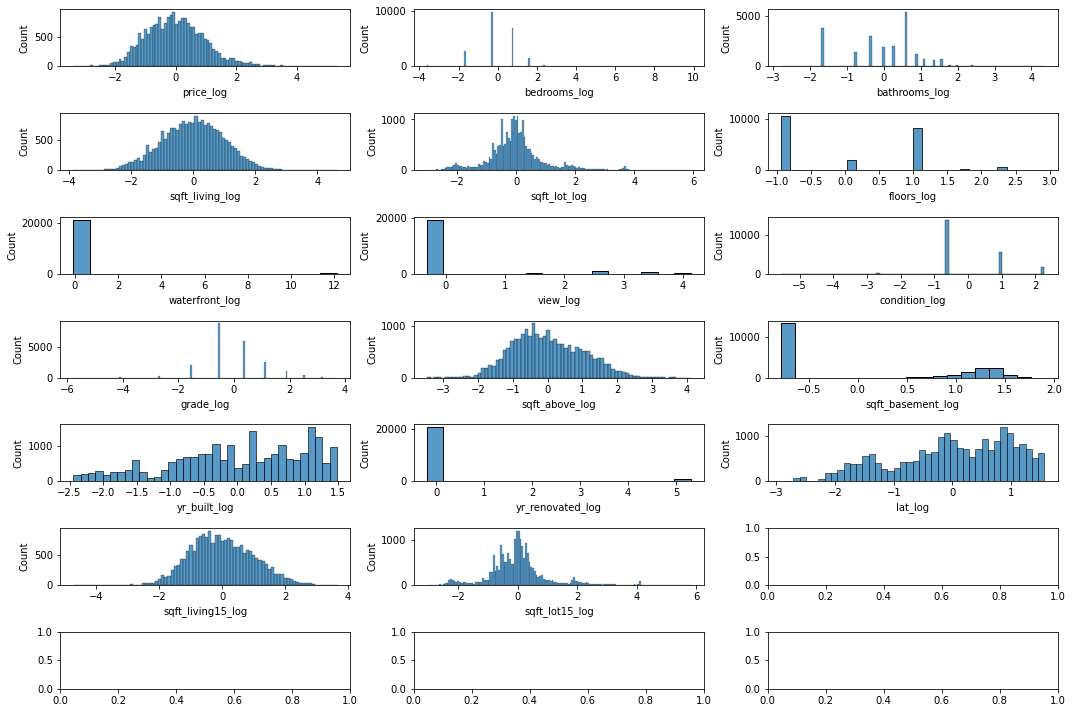

In [14]:
# standardising continuous variables

standardise_conti = df_log.apply(lambda x: (x - x.mean()) / x.std())
fig, ax = plt.subplots(len(log_var) // 3 + int(np.ceil(len(log_var) % 3)), 3, figsize=(15, 10))
for i, c in enumerate(log_var):
    sns.histplot(standardise_conti[c], ax=ax[i // 3, i % 3])
fig.tight_layout()

In [81]:
# recognising Discreet variables
raw_var =['view','condition','grade','waterfront','bedrooms','bathrooms','floors']
disc_var =['zipcode']
raw_var



['view', 'condition', 'grade', 'waterfront', 'bedrooms', 'bathrooms', 'floors']

In [82]:
# converting into one hot encoding

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='first')
enc.fit(df[disc_var])
ohe_cols = enc.transform(df[disc_var])
ohe_cols.toarray().shape

(21597, 69)

In [83]:
#  turn this into dataframe

ohe_df =pd.DataFrame(ohe_cols.toarray(), columns=enc.get_feature_names_out(disc_var))
ohe_df.head()

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
raw_df =pd.DataFrame(raw_var)
raw_df

,0
0,view
1,condition
2,grade
3,waterfront
4,bedrooms
5,bathrooms
6,floors


In [86]:
#  joining continuous standardised variables and one hot encoded variabels in a DataFrame

df = standardise_conti.join(ohe_df, how='left')

df = df.join(raw_df, how ='left')
df

,price_log,bedrooms_log,bathrooms_log,sqft_living_log,sqft_lot_log,floors_log,waterfront_log,view_log,condition_log,grade_log,...,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,0
0,-1.401997,-0.320351,-1.644140,-1.125564,-0.388490,-0.947087,-0.082498,-0.319476,-0.622718,-0.531764,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,view
1,0.279938,-0.320351,0.290975,0.709416,-0.113302,0.988608,-0.082498,-0.319476,-0.622718,-0.531764,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,condition
2,-1.799429,-1.687516,-1.644140,-2.131418,0.244426,-0.947087,-0.082498,-0.319476,-0.622718,-1.543250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,grade
3,0.499698,0.740104,1.118575,0.070561,-0.523969,-0.947087,-0.082498,-0.319476,2.266346,-0.531764,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,waterfront
4,0.178433,-0.320351,-0.028055,-0.292847,0.008081,-0.947087,-0.082498,-0.319476,-0.622718,0.360430,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,bedrooms
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,-0.483049,-0.320351,0.586352,-0.513318,-2.171142,2.362005,-0.082498,-0.319476,-0.622718,0.360430,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
21593,-0.282955,0.740104,0.586352,0.457935,-0.356962,0.988608,-0.082498,-0.319476,-0.622718,0.360430,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
21594,-0.273006,-1.687516,-2.176364,-1.468954,-1.975055,0.988608,-0.082498,-0.319476,-0.622718,-0.531764,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
21595,-0.282955,-0.320351,0.586352,-0.407862,-1.343051,0.988608,-0.082498,-0.319476,-0.622718,0.360430,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [20]:
#  defininig Y variable 

num_vars = df.describe().columns.tolist()
y_var = 'price_log'
num_vars = [c for c in df if c != y_var]
print(num_vars)

['bedrooms_log', 'bathrooms_log', 'sqft_living_log', 'sqft_lot_log', 'floors_log', 'waterfront_log', 'view_log', 'condition_log', 'grade_log', 'sqft_above_log', 'sqft_basement_log', 'yr_built_log', 'yr_renovated_log', 'lat_log', 'sqft_living15_log', 'sqft_lot15_log', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105', '

In [21]:
#  analysing highest Pearson correlated variables with respect to price

cor = df[num_vars +[y_var]].corr()['price_log'].reset_index()
cor

,index,price_log
0,bedrooms_log,0.347550
1,bathrooms_log,0.532899
2,sqft_living_log,0.674829
3,sqft_lot_log,0.138268
4,floors_log,0.319657
...,...,...
81,zipcode_98178,-0.102879
82,zipcode_98188,-0.080068
83,zipcode_98198,-0.112345
84,zipcode_98199,0.101801


In [22]:
cor[abs(cor['price_log'])>0.6]

,index,price_log
2,sqft_living_log,0.674829
8,grade_log,0.695595
14,sqft_living15_log,0.607167
85,price_log,1.000000


In [23]:
# creating a simple baseline model


simple_var = ['sqft_living_log','sqft_living15_log', 'grade_log']

simple_df = df[simple_var +[y_var]]
simple_df.head()


,sqft_living_log,sqft_living15_log,grade_log,price_log
0,-1.125564,-1.035420,-0.531764,-1.401997
1,0.709416,-0.326861,-0.531764,0.279938
2,-2.131418,1.126525,-1.543250,-1.799429
3,0.070561,-0.990188,-0.531764,0.499698
4,-0.292847,-0.134305,0.360430,0.178433


In [24]:
simple_df.describe()

,sqft_living_log,sqft_living15_log,grade_log,price_log
count,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04
mean,4.115159e-13,6.204906e-13,6.092928e-13,-2.778020e-13
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.856839e+00,-4.731544e+00,-5.782280e+00,-3.387568e+00
25%,-6.726480e-01,-7.114525e-01,-5.317639e-01,-6.949025e-01
50%,9.638878e-03,-6.718734e-02,-5.317639e-01,-5.926901e-02
75%,6.909955e-01,6.929214e-01,3.604301e-01,6.244259e-01
max,4.628371e+00,3.648206e+00,3.707266e+00,5.333773e+00


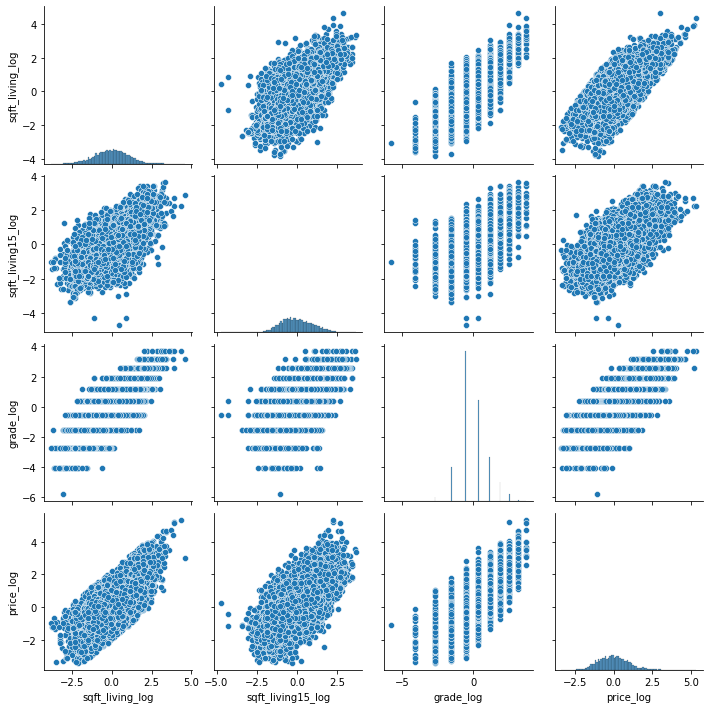

In [25]:
#  checking out graphs

sns.pairplot(simple_df)

In [26]:
# defining X and y variable
X = simple_df.drop(y_var, axis=1)
y = simple_df[y_var]

In [27]:
# train test split with 75% - 25%

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=True, test_size =0.25, random_state=50)

In [28]:
X_train.head()

,sqft_living_log,sqft_living15_log,grade_log
6465,1.619186,2.187764,2.539591
10332,0.046381,-2.053465,-0.531764
17878,-1.423195,-1.838640,-1.543250
18830,0.653716,0.030803,0.360430
12147,0.210659,-0.151317,0.360430


In [29]:
y_train.head()

6465     1.722635
10332   -0.076226
17878   -1.261012
18830    0.389666
12147   -0.199361
Name: price_log, dtype: float64

In [30]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(16197, 3) (5400, 3) (16197,) (5400,)


In [31]:
#  fitting X and Y in linear Regression model

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [32]:
# predicting 

y_trainpreds = linreg.predict(X_train)
y_testpreds = linreg.predict(X_test)

In [33]:
#  finding out R Squared and Mean Squared error for test and train to see how our Regression model is fitted

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

rsq_train = r2_score(y_train, y_trainpreds)
mse_train = mean_squared_error(y_train, y_trainpreds)
rsq_test = r2_score(y_test, y_testpreds)
mse_test = mean_squared_error(y_test, y_testpreds)

print('rsq_train', rsq_train)
print('rsq_test:', rsq_test)
print('mse_train:', mse_train)
print('mse_test:', mse_test)

rsq_train 0.545027037943015
rsq_test: 0.5436222829132126
mse_train: 0.4563399893492017
mse_test: 0.452114309226942


In [34]:
# calculate adjusted r squared value fro test and train data
# Adj r2 = 1- (1-R2)* (n-1)/ (n-p-1)

def adj_r2(r2, sample, major_X):
    part = (sample -1)/ (sample - major_X -1)
    return 1-((1-r2) * part)

In [35]:
adj_rsqtrain = adj_r2(rsq_train, len(X_train), len(X_train.columns))
adj_rsqtest = adj_r2(rsq_test, len(X_test), len(X_test.columns))

print('adj r2 train:', adj_rsqtrain)
print('adj r2 test:', adj_rsqtest)

adj r2 train: 0.5449427472688859
adj r2 test: 0.5433685517880716


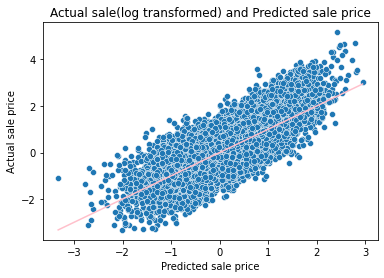

In [36]:
# Plotting training Log transformed training set predictions

import matplotlib.pyplot as plt
sns.scatterplot(x = y_trainpreds, y= y_train)
sns.lineplot(x = y_trainpreds, y = y_trainpreds, color ='pink' )
plt.title('Actual sale(log transformed) and Predicted sale price')
plt.xlabel('Predicted sale price')
plt.ylabel('Actual sale price')
plt.show()

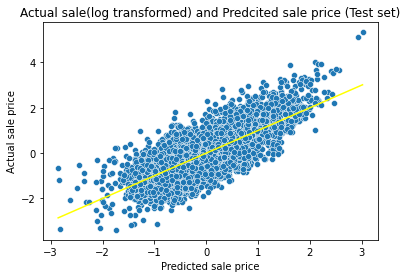

In [37]:
#  plotting Log transformed Test set predictions

sns.scatterplot(x = y_testpreds, y= y_test)
sns.lineplot(x = y_testpreds, y = y_testpreds, color ='yellow' )
plt.title('Actual sale(log transformed) and Predcited sale price (Test set)')
plt.xlabel('Predicted sale price')
plt.ylabel('Actual sale price')
plt.show()

<AxesSubplot:ylabel='Count'>

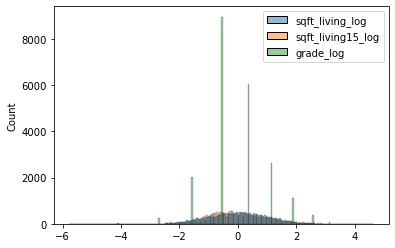

In [38]:
sns.histplot(X)

<AxesSubplot:xlabel='price_log', ylabel='Count'>

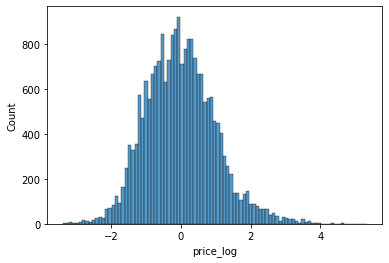

In [39]:
sns.histplot(y)

In [40]:
linreg.fit(X_train, y_train)
y_trainpreds = linreg.predict(X_train)
y_testpreds = linreg.predict(X_test)

In [41]:
#  cross validate to refine the model

from sklearn.model_selection import cross_validate
cross_val_results = cross_validate(linreg, X, y, cv=10, scoring=["r2", "neg_mean_squared_error"], return_train_score=True)
cross_val_results

{'fit_time': array([0.00399828, 0.00299978, 0.00325513, 0.0030005 , 0.00200033,
        0.00304461, 0.00199986, 0.00200009, 0.00199986, 0.00099921]),
 'score_time': array([0.00199962, 0.00099993, 0.00299978, 0.00099969, 0.00099993,
        0.00099945, 0.00100017, 0.00100017, 0.00100017, 0.00100017]),
 'test_r2': array([0.52496232, 0.54913447, 0.51892386, 0.55042631, 0.49917623,
        0.54619882, 0.54363924, 0.55979255, 0.5393655 , 0.57667907]),
 'train_r2': array([0.54682018, 0.54413521, 0.54744748, 0.54384101, 0.54911813,
        0.5444629 , 0.54480448, 0.54284424, 0.54527385, 0.53873966]),
 'test_neg_mean_squared_error': array([-0.47337488, -0.4875562 , -0.46419386, -0.46096063, -0.45232961,
        -0.46239277, -0.46089002, -0.47202246, -0.47312255, -0.35868321]),
 'train_neg_mean_squared_error': array([-0.45328133, -0.45171349, -0.45429019, -0.45464085, -0.45561274,
        -0.45448043, -0.45466967, -0.45342984, -0.45333241, -0.46654411])}

In [42]:
sorted(cross_val_results.keys())

['fit_time',
 'score_time',
 'test_neg_mean_squared_error',
 'test_r2',
 'train_neg_mean_squared_error',
 'train_r2']

In [43]:
#  getting avg values for the keys.

cross_val_avg = {k: np.mean(v) for k,v in cross_val_results.items()}
cross_val_avg

{'fit_time': 0.002529764175415039,
 'score_time': 0.001299905776977539,
 'test_r2': 0.5408298377096007,
 'train_r2': 0.5447487147655053,
 'test_neg_mean_squared_error': -0.45655261934921265,
 'train_neg_mean_squared_error': -0.45519950540485477}

In [44]:
#  summary list output

summary = list()
cross_val_avg['n_features'] = len(X.columns)
cross_val_avg['dataset'] = 'simple'

summary.append(cross_val_avg)
pd.DataFrame(summary)



,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,n_features,dataset
0,0.00253,0.0013,0.54083,0.544749,-0.456553,-0.4552,3,simple


In [45]:
# Introducing more X variables
num2_var = num_vars[:8]

In [46]:
df[num2_var].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedrooms_log     21597 non-null  float64
 1   bathrooms_log    21597 non-null  float64
 2   sqft_living_log  21597 non-null  float64
 3   sqft_lot_log     21597 non-null  float64
 4   floors_log       21597 non-null  float64
 5   waterfront_log   21597 non-null  float64
 6   view_log         21597 non-null  float64
 7   condition_log    21597 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [47]:
df[num2_var].describe()

,bedrooms_log,bathrooms_log,sqft_living_log,sqft_lot_log,floors_log,waterfront_log,view_log,condition_log
count,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04
mean,1.322714e-14,-7.403432e-14,4.115159e-13,-9.210487e-14,-8.540480e-14,-1.048729e-15,5.633298e-15,-8.316691e-13
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.614426e+00,-2.790771e+00,-3.856839e+00,-3.031500e+00,-9.470866e-01,-8.249784e-02,-3.194758e-01,-5.561606e+00
25%,-3.203510e-01,-3.748615e-01,-6.726480e-01,-5.151367e-01,-9.470866e-01,-8.249784e-02,-3.194758e-01,-6.227181e-01
50%,-3.203510e-01,2.909753e-01,9.638878e-03,-5.718997e-02,1.182029e-01,-8.249784e-02,-3.194758e-01,-6.227181e-01
75%,7.401043e-01,5.863517e-01,6.909955e-01,3.178784e-01,9.886077e-01,-8.249784e-02,-3.194758e-01,9.672488e-01
max,9.849983e+00,4.350745e+00,4.628371e+00,5.906296e+00,2.924302e+00,1.212097e+01,4.132115e+00,2.266346e+00


In [48]:
#  Check for multicollinearity
df[num2_var].corr()[abs(df[num2_var].corr())>0.6]

,bedrooms_log,bathrooms_log,sqft_living_log,sqft_lot_log,floors_log,waterfront_log,view_log,condition_log
bedrooms_log,1.000000,NaN,0.649916,NaN,NaN,NaN,NaN,NaN
bathrooms_log,NaN,1.000000,0.765945,NaN,NaN,NaN,NaN,NaN
sqft_living_log,0.649916,0.765945,1.000000,NaN,NaN,NaN,NaN,NaN
sqft_lot_log,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
floors_log,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
waterfront_log,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
view_log,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
condition_log,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [49]:
#  dropping two variables from our simple model. adding more variables to our model.
temp_df = df[num2_var].drop(['sqft_living_log'], axis=1)
temp_df


,bedrooms_log,bathrooms_log,sqft_lot_log,floors_log,waterfront_log,view_log,condition_log
0,-0.320351,-1.644140,-0.388490,-0.947087,-0.082498,-0.319476,-0.622718
1,-0.320351,0.290975,-0.113302,0.988608,-0.082498,-0.319476,-0.622718
2,-1.687516,-1.644140,0.244426,-0.947087,-0.082498,-0.319476,-0.622718
3,0.740104,1.118575,-0.523969,-0.947087,-0.082498,-0.319476,2.266346
4,-0.320351,-0.028055,0.008081,-0.947087,-0.082498,-0.319476,-0.622718
...,...,...,...,...,...,...,...
21592,-0.320351,0.586352,-2.171142,2.362005,-0.082498,-0.319476,-0.622718
21593,0.740104,0.586352,-0.356962,0.988608,-0.082498,-0.319476,-0.622718
21594,-1.687516,-2.176364,-1.975055,0.988608,-0.082498,-0.319476,-0.622718
21595,-0.320351,0.586352,-1.343051,0.988608,-0.082498,-0.319476,-0.622718


In [50]:
X = temp_df
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=True, test_size =0.25, random_state=50)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(16197, 7) (5400, 7)
(16197,) (5400,)


In [51]:
#  Define function 

def get_cross_val_avg(X, y, regmodel, setname, scoring=None):
    if scoring is None:
        scoring=["r2", "neg_mean_squared_error"]
    cross_val_results = cross_validate(linreg, X, y, cv=10, scoring= scoring, return_train_score=True)
    cross_val_avg = {k: np.mean(v) for k,v in cross_val_results.items()}
    cross_val_avg['n_features'] = len(X.columns)
    cross_val_avg['dataset'] = setname
    return cross_val_avg

In [52]:
scores = get_cross_val_avg(X, y, linreg, 'with 7 more variables')
summary.append(scores)
pd.DataFrame(summary)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,n_features,dataset
0,0.002530,0.00130,0.540830,0.544749,-0.456553,-0.45520,3,simple
1,0.003336,0.00149,0.375939,0.381973,-0.619628,-0.61795,7,with 7 more variables


In [53]:
#  adding more X variables
num3_var = num_vars[8:]

In [54]:
df[num3_var].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 78 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   grade_log          21597 non-null  float64
 1   sqft_above_log     21597 non-null  float64
 2   sqft_basement_log  21597 non-null  float64
 3   yr_built_log       21597 non-null  float64
 4   yr_renovated_log   21597 non-null  float64
 5   lat_log            21597 non-null  float64
 6   sqft_living15_log  21597 non-null  float64
 7   sqft_lot15_log     21597 non-null  float64
 8   zipcode_98002      21597 non-null  float64
 9   zipcode_98003      21597 non-null  float64
 10  zipcode_98004      21597 non-null  float64
 11  zipcode_98005      21597 non-null  float64
 12  zipcode_98006      21597 non-null  float64
 13  zipcode_98007      21597 non-null  float64
 14  zipcode_98008      21597 non-null  float64
 15  zipcode_98010      21597 non-null  float64
 16  zipcode_98011      215

In [55]:
temp_dff = df[num3_var]
temp_dff

,grade_log,sqft_above_log,sqft_basement_log,yr_built_log,yr_renovated_log,lat_log,sqft_living15_log,sqft_lot15_log,zipcode_98002,zipcode_98003,...,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,0
0,-0.531764,-0.753624,-0.785188,-0.537412,-0.188883,-0.351390,-1.035420,-0.395502,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,view
1,-0.531764,0.672625,1.112322,-0.674329,5.292283,1.160045,-0.326861,-0.024341,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,condition
2,-1.543250,-1.752585,-0.785188,-1.293945,-0.188883,1.281512,1.126525,0.041983,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,grade
3,-0.531764,-1.026820,1.372094,-0.196342,-0.188883,-0.282087,-0.990188,-0.545897,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,waterfront
4,0.360430,0.073385,-0.785188,0.547945,-0.188883,0.410186,-0.134305,-0.046448,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,bedrooms
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0.360430,-0.145574,-0.785188,1.284041,-0.188883,1.004017,-0.630564,-2.019795,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
21593,0.360430,0.819022,-0.785188,1.450211,-0.188883,-0.355000,-0.083829,-0.097176,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
21594,-0.531764,-1.094661,-0.785188,1.284041,-0.188883,0.248778,-1.868420,-1.668985,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
21595,0.360430,-0.040842,-0.785188,1.117456,-0.188883,-0.183210,-0.879952,-2.215512,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [56]:
type(temp_dff)

pandas.core.frame.DataFrame

In [57]:
temp_df.join(temp_dff)

,bedrooms_log,bathrooms_log,sqft_lot_log,floors_log,waterfront_log,view_log,condition_log,grade_log,sqft_above_log,sqft_basement_log,...,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,0
0,-0.320351,-1.644140,-0.388490,-0.947087,-0.082498,-0.319476,-0.622718,-0.531764,-0.753624,-0.785188,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,view
1,-0.320351,0.290975,-0.113302,0.988608,-0.082498,-0.319476,-0.622718,-0.531764,0.672625,1.112322,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,condition
2,-1.687516,-1.644140,0.244426,-0.947087,-0.082498,-0.319476,-0.622718,-1.543250,-1.752585,-0.785188,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,grade
3,0.740104,1.118575,-0.523969,-0.947087,-0.082498,-0.319476,2.266346,-0.531764,-1.026820,1.372094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,waterfront
4,-0.320351,-0.028055,0.008081,-0.947087,-0.082498,-0.319476,-0.622718,0.360430,0.073385,-0.785188,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,bedrooms
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,-0.320351,0.586352,-2.171142,2.362005,-0.082498,-0.319476,-0.622718,0.360430,-0.145574,-0.785188,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
21593,0.740104,0.586352,-0.356962,0.988608,-0.082498,-0.319476,-0.622718,0.360430,0.819022,-0.785188,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
21594,-1.687516,-2.176364,-1.975055,0.988608,-0.082498,-0.319476,-0.622718,-0.531764,-1.094661,-0.785188,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
21595,-0.320351,0.586352,-1.343051,0.988608,-0.082498,-0.319476,-0.622718,0.360430,-0.040842,-0.785188,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [58]:
X = temp_df.join(temp_dff)
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=True, test_size =0.25, random_state=50)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(16197, 85) (5400, 85)
(16197,) (5400,)


In [59]:
type(X)

pandas.core.frame.DataFrame

In [61]:
#  run model again
scores = get_cross_val_avg(X, y, linreg, 'with 85 more variables')
summary.append(scores)
pd.DataFrame(summary)

C:\Users\shrad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\shrad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\shrad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\shrad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\shrad\anaconda3\lib

,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,n_features,dataset
0,0.002530,0.00130,0.540830,0.544749,-0.456553,-0.45520,3,simple
1,0.003336,0.00149,0.375939,0.381973,-0.619628,-0.61795,7,with 7 more variables
2,0.093258,0.00000,NaN,NaN,NaN,NaN,85,with 86 more variables
3,0.084139,0.00000,NaN,NaN,NaN,NaN,85,with 85 more variables
